## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    """Code Here
    建立你的神經網路
    """
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x =  BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x =  BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
BATCH_SIZES = [2, 16, 32, 128, 256]
EPOCHS = 30
MOMENTUM = 0.95
LEARNING_RATE = 1e-3

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZES:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    # Collect results
    exp_name_tag = "Bath {}".format(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               8320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 44s 889us/step - loss: 1.4810 - acc: 0.4740 - val_loss: 1.4726 - val_acc: 0.4716
Epoch 9/30
50000/50000 [==============================] - 45s 902us/step - loss: 1.4633 - acc: 0.4807 - val_loss: 1.4942 - val_acc: 0.4638
Epoch 10/30
50000/50000 [==============================] - 45s 904us/step - loss: 1.4505 - acc: 0.4852 - val_loss: 1.4920 - val_acc: 0.4735
Epoch 11/30
50000/50000 [==============================] - 46s 912us/step - loss: 1.4409 - acc: 0.4875 - val_loss: 1.4988 - val_acc: 0.4696
Epoch 12/30
50000/50000 [==============================] - 46s 916us/step - loss: 1.4332 - acc: 0.4916 - val_loss: 1.5064 - val_acc: 0.4627
Epoch 13/30
50000/50000 [==============================] - 46s 924us/step - loss: 1.4141 - acc: 0.4980 - val_loss: 1.4317 - val_acc: 0.4846
Epoch 14/30
50000/50000 [==============================] - 50s 1ms/step - loss: 1.4064 - acc: 0.5019 - val_loss: 1.4077 - val_acc: 0.4980
Epoch 15/30
50000/50000 [==========

50000/50000 [==============================] - 27s 534us/step - loss: 1.1578 - acc: 0.5891 - val_loss: 1.4195 - val_acc: 0.5028
Epoch 27/30
50000/50000 [==============================] - 29s 571us/step - loss: 1.1605 - acc: 0.5880 - val_loss: 1.4444 - val_acc: 0.4947
Epoch 28/30
50000/50000 [==============================] - 28s 555us/step - loss: 1.1513 - acc: 0.5914 - val_loss: 1.5082 - val_acc: 0.4769
Epoch 29/30
50000/50000 [==============================] - 27s 541us/step - loss: 1.1413 - acc: 0.5946 - val_loss: 1.4390 - val_acc: 0.4988
Epoch 30/30
50000/50000 [==============================] - 27s 543us/step - loss: 1.1319 - acc: 0.5971 - val_loss: 1.4829 - val_acc: 0.48711.1321 - acc: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None

50000/50000 [==============================] - 10s 196us/step - loss: 1.5761 - acc: 0.4457 - val_loss: 1.6463 - val_acc: 0.4173
Epoch 4/30
50000/50000 [==============================] - 10s 195us/step - loss: 1.5166 - acc: 0.4657 - val_loss: 1.5404 - val_acc: 0.4462
Epoch 5/30
50000/50000 [==============================] - 10s 194us/step - loss: 1.4677 - acc: 0.4816 - val_loss: 1.5562 - val_acc: 0.4456
Epoch 6/30
50000/50000 [==============================] - 10s 195us/step - loss: 1.4306 - acc: 0.4937 - val_loss: 1.5194 - val_acc: 0.4529
Epoch 7/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.3976 - acc: 0.5045 - val_loss: 1.5104 - val_acc: 0.4638
Epoch 8/30
50000/50000 [==============================] - 10s 199us/step - loss: 1.3708 - acc: 0.5150 - val_loss: 1.5107 - val_acc: 0.4585
Epoch 9/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.3428 - acc: 0.5257 - val_loss: 1.4975 - val_acc: 0.4656
Epoch 10/30
50000/50000 [=============

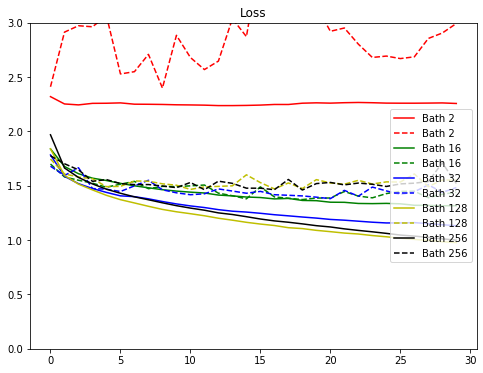

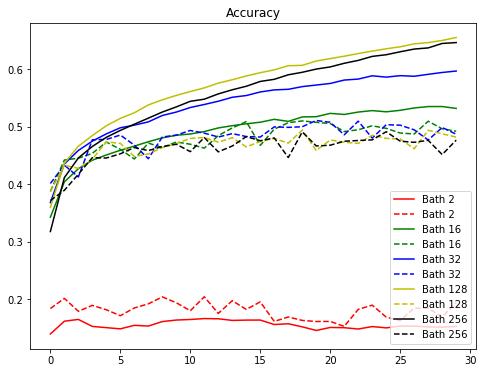

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [17]:
def build_mlp_back(input_shape, output_units=10, num_neurons=[128, 64, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    """Code Here
    建立你的神經網路
    """
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(input_layer)
            x =  BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x =  BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
BATCH_SIZE = 128
results_back = {}
build = [build_mlp, build_mlp_back]
for bb in build:
    model = bb(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    # Collect results
    exp_name_tag = "{}".format(bb.__name__)
    results_back[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_28 (Batc (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_29 (Batc (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               8320      
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 13s 267us/step - loss: 1.3371 - acc: 0.5277 - val_loss: 1.6471 - val_acc: 0.4194
Epoch 6/30
50000/50000 [==============================] - 13s 261us/step - loss: 1.2907 - acc: 0.5452 - val_loss: 1.5849 - val_acc: 0.4473
Epoch 7/30
50000/50000 [==============================] - 13s 262us/step - loss: 1.2487 - acc: 0.5597 - val_loss: 1.5398 - val_acc: 0.4606
Epoch 8/30
50000/50000 [==============================] - 13s 266us/step - loss: 1.2130 - acc: 0.5736 - val_loss: 1.5877 - val_acc: 0.4464
Epoch 9/30
50000/50000 [==============================] - 13s 263us/step - loss: 1.1791 - acc: 0.5842 - val_loss: 1.5217 - val_acc: 0.4642
Epoch 10/30
50000/50000 [==============================] - 14s 274us/step - loss: 1.1494 - acc: 0.5943 - val_loss: 1.5222 - val_acc: 0.4665
Epoch 11/30
50000/50000 [==============================] - 14s 271us/step - loss: 1.1148 - acc: 0.6066 - val_loss: 1.5481 - val_acc: 0.4586
Epoch 12/30
50000/50000 [===========

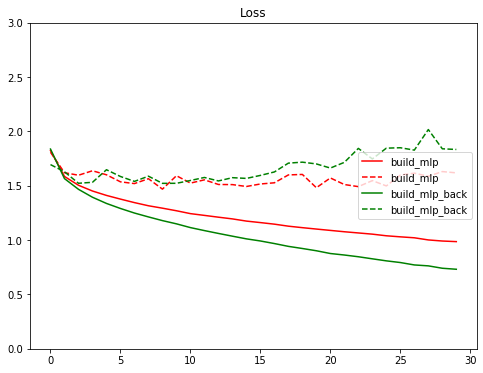

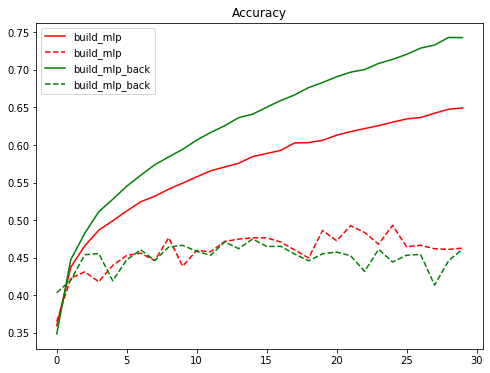

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_back.keys()):
    plt.plot(range(len(results_back[cond]['train-loss'])),results_back[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_back[cond]['valid-loss'])),results_back[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_back.keys()):
    plt.plot(range(len(results_back[cond]['train-acc'])),results_back[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_back[cond]['valid-acc'])),results_back[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [25]:
def build_mlp_input(input_shape, output_units=10, num_neurons=[128, 64, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    """Code Here
    建立你的神經網路
    """
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x =  BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x =  BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
BATCH_SIZE = 128
results_input = {}
build = [build_mlp, build_mlp_input]
for bb in build:
    model = bb(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    # Collect results
    exp_name_tag = "{}".format(bb.__name__)
    results_input[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_37 (Batc (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_38 (Batc (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               8320      
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
__________

Epoch 7/30
50000/50000 [==============================] - 21s 420us/step - loss: 1.2546 - acc: 0.5569 - val_loss: 1.4108 - val_acc: 0.5017
Epoch 8/30
50000/50000 [==============================] - 21s 425us/step - loss: 1.2154 - acc: 0.5680 - val_loss: 1.4111 - val_acc: 0.5037oss: 1.2103 - acc: 0.569
Epoch 9/30
50000/50000 [==============================] - 20s 410us/step - loss: 1.1839 - acc: 0.5792 - val_loss: 1.3966 - val_acc: 0.5068
Epoch 10/30
50000/50000 [==============================] - 21s 419us/step - loss: 1.1537 - acc: 0.5938 - val_loss: 1.3873 - val_acc: 0.5137
Epoch 11/30
50000/50000 [==============================] - 21s 417us/step - loss: 1.1277 - acc: 0.5998 - val_loss: 1.4004 - val_acc: 0.5125
Epoch 12/30
50000/50000 [==============================] - 21s 412us/step - loss: 1.0979 - acc: 0.6129 - val_loss: 1.4000 - val_acc: 0.5140
Epoch 13/30
50000/50000 [==============================] - 21s 417us/step - loss: 1.0707 - acc: 0.6239 - val_loss: 1.3955 - val_acc: 0.5160

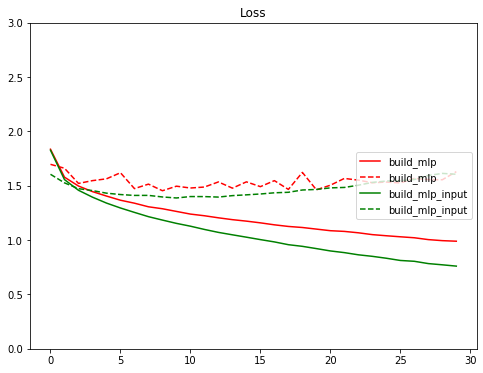

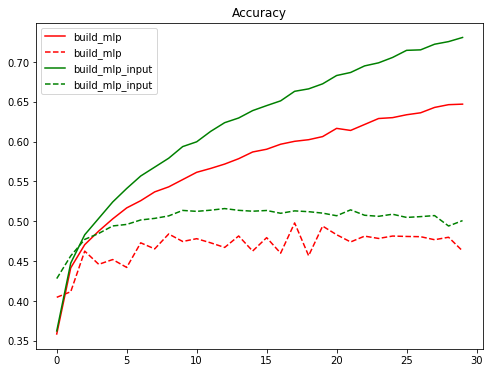

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_input.keys()):
    plt.plot(range(len(results_input[cond]['train-loss'])),results_input[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_input[cond]['valid-loss'])),results_input[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_input.keys()):
    plt.plot(range(len(results_input[cond]['train-acc'])),results_input[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_input[cond]['valid-acc'])),results_input[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
#Batch size 的比較很明顯的看到當batch太小的時候很不穩定，應該跟每一層的平均很不穩定有關 導致梯度很不穩定
#但是當batch size的時候正則化效果又有限，validation set跟training set差距比較大，size是16的時候表現最好

In [29]:
#batch normalization 加在activation 之前很明顯效果很差

In [ ]:
#在input layer加上batch normalization之後validation set的收斂變得很平滑，training set也收斂的比較快